In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
from celluloid import Camera
# from matplotlib.animation import PillowWriter

# import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

In [2]:
plays = pd.read_csv("data/plays.csv")

tracking18 = pd.read_csv("data/tracking2018.csv")

In [3]:
plays["gameId"].unique()[0:10]

array([2018090600, 2018090900, 2018090901, 2018090902, 2018090903,
       2018090905, 2018090906, 2018090907, 2018090909, 2018090910])

In [4]:
# GAME_ID = 2018090600
GAME_ID = 2018090901

In [5]:
game_play_ids = plays.loc[
    plays["gameId"] == GAME_ID
]["playId"].unique()

In [6]:
game_play_ids

array([  36,  118,  313,  474,  588,  887, 1254, 1491, 1723, 2022, 2286,
       2302, 2473, 2489, 2632, 2708, 2735, 2907, 3215, 3349, 3463, 3799,
       3815, 3960, 4136, 4214, 4245, 4352, 4560, 4648, 4833, 4965, 5191,
       5480])

In [7]:
PLAY_ID = 36

In [8]:
def get_play_tracking(gameid, playid, plays, tracking):
    play = plays.loc[
        (plays["gameId"] == gameid) &
        (plays["playId"] == playid)
    ].copy()
    
    play_tracking = tracking.loc[
        (tracking["gameId"] == gameid) &
        (tracking["playId"] == playid)
    ].copy()
    
    return play_tracking

In [9]:
play_tracking_df = get_play_tracking(GAME_ID, PLAY_ID, plays, tracking18)
MAX_FRAME_ID = play_tracking_df["frameId"].max()

In [10]:
football, football_attributes = svg2paths("american-football.svg")
football_marker = parse_path(football_attributes[0]['d'])

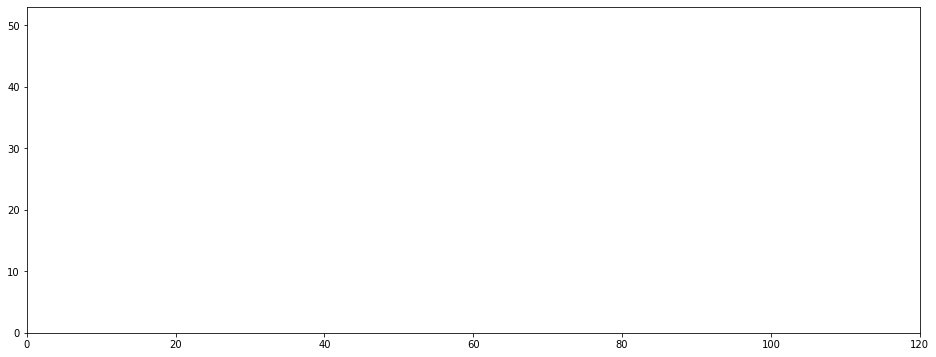

In [11]:
fig = plt.figure(figsize=(16, 6));
ax = plt.axes(xlim=(0, 120), ylim=(0, 53));
camera = Camera(fig)

In [12]:
for frame in range(1, MAX_FRAME_ID):
    play_tracking = play_tracking_df.loc[
        play_tracking_df["frameId"] == frame
    ]
    home_team = play_tracking.loc[play_tracking["team"] == 'home']
    away_team = play_tracking.loc[play_tracking["team"] == 'away']
    football =  play_tracking.loc[play_tracking["team"] == 'football']

    ax.scatter(home_team["x"], home_team["y"], color="#fb8500", s=150)
    ax.scatter(away_team["x"], away_team["y"], color="#118ab2", s=150)
    ax.scatter(football["x"], football["y"], marker=football_marker, color="brown", s=250)
    ax.set_yticks([])
    ax.set_xticks([30, 60, 90])
    ax.set_xticklabels(["20", "50", "20"])
    ax.vlines(10, 0, 53.3, color="black", linestyle='-', alpha=0.5)
    ax.vlines(60, 0, 53.3, color="black", linestyle='-', alpha=0.5)
    ax.vlines(110, 0, 53.3, color="black", linestyle="-", alpha=0.5)
    camera.snap()

animation = camera.animate()


In [18]:
from IPython.display import HTML
HTML(animation.to_jshtml())

In [21]:
# animation.save('animation.gif', writer='PillowWriter', fps=15)

In [13]:
# What types of plays are there
plays["specialTeamsPlayType"].value_counts()

Kickoff        7843
Punt           5991
Extra Point    3488
Field Goal     2657
Name: specialTeamsPlayType, dtype: int64

# Cluster formations
0. Invert R to L plays
1. Line of scrimmage xy

Offensive and Defensive formations for each play type (kickoff, punt, extra point, and field goal)
Maybe not extra point... due to 2p conversions

In [14]:
game_data = pd.read_csv("data/games.csv")

In [15]:
punt_plays = plays[plays["specialTeamsPlayType"] == "Punt"].copy()

In [16]:
# merge game data 
punt_plays = punt_plays.merge(game_data, left_on="gameId", right_on="gameId")

# Add in tracking for 18, 19, 20 and filter to the first frame only

In [17]:
iter_csv = pd.read_csv("data/tracking2018.csv", iterator=True, chunksize=1e6)
tracking18 = pd.concat([chunk[chunk["frameId"] ==1] for chunk in iter_csv])

iter_csv = pd.read_csv("data/tracking2019.csv", iterator=True, chunksize=1e6)
tracking19 = pd.concat([chunk[chunk["frameId"] ==1] for chunk in iter_csv])

iter_csv = pd.read_csv("data/tracking2020.csv", iterator=True, chunksize=1e6)
tracking20 = pd.concat([chunk[chunk["frameId"] ==1] for chunk in iter_csv])

In [18]:
formation_tracking = pd.concat([tracking18, tracking19, tracking20])

In [19]:
formation_tracking

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
105,2018-12-30T21:25:32.200,62.04,14.23,0.07,0.52,0.00,272.98,325.00,None,40579.0,Ray-Ray Armstrong,52.0,OLB,away,1,2018123000,36,right
210,2018-12-30T21:25:32.200,61.62,5.06,0.08,0.14,0.01,334.89,246.70,None,41316.0,Phillip Gaines,33.0,CB,away,1,2018123000,36,right
315,2018-12-30T21:25:32.200,44.22,37.38,0.11,0.11,0.02,156.01,106.88,None,42398.0,Maxx Williams,87.0,TE,home,1,2018123000,36,right
420,2018-12-30T21:25:32.200,43.83,42.43,0.15,0.17,0.02,104.41,84.56,None,42437.0,Ty Montgomery,88.0,RB,home,1,2018123000,36,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821276,2020-09-15T05:22:31.200,59.82,8.66,0.36,0.28,0.04,327.82,316.07,None,48447.0,P.J. Locke,37.0,DB,home,1,2020091401,4280,right
11821361,2020-09-15T05:22:31.200,60.85,30.88,0.18,0.35,0.02,191.94,296.53,None,52660.0,Tyrie Cleveland,16.0,WR,home,1,2020091401,4280,right
11821446,2020-09-15T05:22:31.200,68.26,10.08,0.10,0.19,0.01,298.65,156.40,None,52662.0,Derrek Tuszka,48.0,LB,home,1,2020091401,4280,right
11821531,2020-09-15T05:22:31.200,68.84,40.93,0.12,0.53,0.01,225.64,224.39,None,52764.0,Essang Bassey,34.0,DB,home,1,2020091401,4280,right


In [20]:
df = formation_tracking.merge(punt_plays, on=["gameId", "playId"])

In [21]:
# Normalize the data
df["x_norm"] = df["x"]
df["y_norm"] = df["y"]
df["absoluteYardlineNumber_norm"] = df["absoluteYardlineNumber"]
df.loc[df["playDirection"] == "right", "x_norm"] = 120 - df.loc[df["playDirection"] == "right", "x"]
df.loc[df["playDirection"] == "right", "y_norm"] = 53 - df.loc[df["playDirection"] == "right", "y"]
df.loc[df["playDirection"] == "right", "absoluteYardlineNumber_norm"] = 120 - df.loc[df["playDirection"] == "right", "absoluteYardlineNumber"]
# df.loc[df["playDirection"] == "right", "yardlineNumber"] = 50 - df.loc[df["playDirection"] == "right", "x"]

In [22]:
df.loc[df["playDirection"] == "right", ["playId", "gameId"]].head(1)

,playId,gameId
23,1267,2018123000


In [56]:
# TEST_GAME_ID = 2018123000
# TEST_PLAY_ID = 1267

# test_play = df.loc[
#     (df['playId'] == TEST_PLAY_ID) &
#     (df['gameId'] == TEST_GAME_ID)
#     ]

In [23]:
def has_possession(row):
    if (row["team"] == "away") and (row["possessionTeam"] == row["visitorTeamAbbr"]):
        return True
    elif (row["team"] == "home") and (row["possessionTeam"] == row["homeTeamAbbr"]):
        return True
    else:
        return False

In [24]:
df["has_possession"] = df.apply(has_possession, axis=1)

In [26]:
df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,...,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,x_norm,y_norm,absoluteYardlineNumber_norm,has_possession,x_from_scrimmage
0,2018-12-30T21:57:58.300,94.82,29.50,0.00,0.00,0.01,278.03,288.96,None,34723.0,...,17,12/30/2018,16:25:00,BAL,CLE,94.82,29.50,81,True,-13.82
1,2018-12-30T21:57:58.300,79.12,31.92,0.15,0.12,0.06,93.32,17.15,None,36060.0,...,17,12/30/2018,16:25:00,BAL,CLE,79.12,31.92,81,False,1.88
2,2018-12-30T21:57:58.300,81.71,29.84,0.01,0.02,0.00,276.86,159.06,None,38955.0,...,17,12/30/2018,16:25:00,BAL,CLE,81.71,29.84,81,True,-0.71
3,2018-12-30T21:57:58.300,80.41,30.72,0.32,0.44,0.06,67.25,349.56,None,40042.0,...,17,12/30/2018,16:25:00,BAL,CLE,80.41,30.72,81,False,0.59
4,2018-12-30T21:57:58.300,82.39,28.17,0.01,0.01,0.00,299.35,11.31,None,40579.0,...,17,12/30/2018,16:25:00,BAL,CLE,82.39,28.17,81,True,-1.39


In [27]:
# should be dist from line of scrimmage
df["x_from_scrimmage"] = df["absoluteYardlineNumber_norm"] - df["x_norm"]

In [28]:
# defense
defense_df = df.loc[~df["has_possession"]].copy()

# offense
offense_df = df.loc[df["has_possession"]].copy()

In [65]:
offense_df.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'team', 'frameId', 'gameId',
       'playId', 'playDirection', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'specialTeamsPlayType',
       'specialTeamsResult', 'kickerId', 'returnerId', 'kickBlockerId',
       'yardlineSide', 'yardlineNumber', 'gameClock', 'penaltyCodes',
       'penaltyJerseyNumbers', 'penaltyYards', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'kickLength', 'kickReturnYardage',
       'playResult', 'absoluteYardlineNumber', 'season', 'week', 'gameDate',
       'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'x_norm',
       'y_norm', 'absoluteYardlineNumber_norm', 'has_possession',
       'x_from_scrimmage', 'x_transformed', 'y_transformed'],
      dtype='object')

In [66]:
offense_df.loc[offense_df["x_from_scrimmage"] > 0][["x", "yardlineNumber", "playDirection"]]

,x,yardlineNumber,playDirection
140,39.22,29,right
1397,53.26,43,right
2489,65.41,45,right
2924,44.32,34,right
3796,61.78,48,left
...,...,...,...
135758,65.99,44,left
135976,44.04,34,right
135991,44.77,34,right
136296,52.18,42,right


<AxesSubplot:>

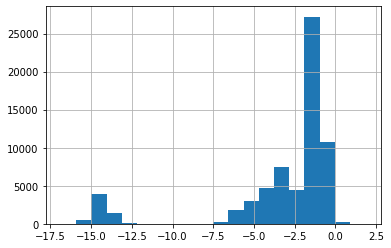

In [35]:
# these should all be negative values
offense_df["x_from_scrimmage"].hist(bins=20)


<AxesSubplot:>

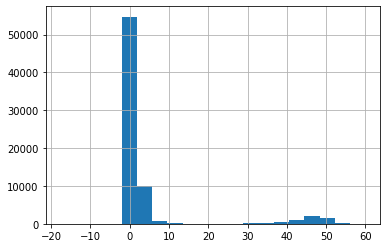

In [36]:
# these should all be positive values
defense_df["x_from_scrimmage"].hist(bins=20)

In [42]:
def_min_x = defense_df["x_from_scrimmage"].min()
def_max_x = defense_df["x_from_scrimmage"].max()

off_min_x = offense_df["x_from_scrimmage"].min()
off_max_x = offense_df["x_from_scrimmage"].max()

print(def_min_x, def_max_x)
print(off_min_x, off_max_x)


-17.560000000000002 59.92
-16.86 1.8299999999999983


In [47]:
x_dim = 100 * 2 
y_dim = 53 * 2 # roughly half-yard increments

defense_x_range = np.linspace(def_min_x, def_max_x, x_dim)
offense_x_range = np.linspace(off_min_x, off_max_x, x_dim)

y_range = np.linspace(0, 53, y_dim)

In [50]:
def get_closest(array, values):
    # make sure array is a numpy array
    array = np.array(array)

    # get insert positions
    idxs = np.searchsorted(array, values, side="left")
    
    # find indexes where previous index is closer
    prev_idx_is_less = ((idxs == len(array))|(np.fabs(values - array[np.maximum(idxs-1, 0)]) < np.fabs(values - array[np.minimum(idxs, len(array)-1)])))
    idxs[prev_idx_is_less] -= 1
    
    return array[idxs]

In [54]:
defense_df["x_transformed"] = get_closest(defense_x_range, defense_df["x_from_scrimmage"])
defense_df["y_transformed"] = get_closest(y_range, defense_df["y_norm"])

offense_df["x_transformed"] = get_closest(offense_x_range, offense_df["x_from_scrimmage"])
offense_df["y_transformed"] = get_closest(y_range, offense_df["y_norm"])

In [55]:
defense_df

,time,x,y,s,a,dis,o,dir,event,nflId,...,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,x_norm,y_norm,absoluteYardlineNumber_norm,has_possession,x_from_scrimmage,x_transformed,y_transformed
1,2018-12-30T21:57:58.300,79.12,31.92,0.15,0.12,0.06,93.32,17.15,None,36060.0,...,16:25:00,BAL,CLE,79.12,31.92,81,False,1.88,1.907337,31.800000
3,2018-12-30T21:57:58.300,80.41,30.72,0.32,0.44,0.06,67.25,349.56,None,40042.0,...,16:25:00,BAL,CLE,80.41,30.72,81,False,0.59,0.739296,30.790476
5,2018-12-30T21:57:58.300,80.64,32.52,0.01,0.01,0.01,112.89,64.40,None,41363.0,...,16:25:00,BAL,CLE,80.64,32.52,81,False,0.36,0.349950,32.304762
7,2018-12-30T21:57:58.300,33.33,28.38,0.32,0.75,0.03,126.07,293.91,None,43349.0,...,16:25:00,BAL,CLE,33.33,28.38,81,False,47.67,47.850251,28.266667
10,2018-12-30T21:57:58.300,80.35,35.04,0.01,0.01,0.00,80.40,133.09,None,43435.0,...,16:25:00,BAL,CLE,80.35,35.04,81,False,0.65,0.739296,34.828571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137783,2020-09-15T05:07:41.600,49.95,25.45,0.12,0.11,0.04,87.08,132.74,None,46846.0,...,22:20:00,DEN,TEN,49.95,25.45,52,False,2.05,1.907337,25.238095
137784,2020-09-15T05:07:41.600,51.14,18.41,0.00,0.00,0.00,122.91,322.23,None,47899.0,...,22:20:00,DEN,TEN,51.14,18.41,52,False,0.86,0.739296,18.171429
137787,2020-09-15T05:07:41.600,51.22,29.89,0.05,0.05,0.03,172.86,54.25,None,48207.0,...,22:20:00,DEN,TEN,51.22,29.89,52,False,0.78,0.739296,29.780952
137790,2020-09-15T05:07:41.600,50.11,22.03,0.04,0.04,0.02,55.64,44.31,None,52651.0,...,22:20:00,DEN,TEN,50.11,22.03,52,False,1.89,1.907337,22.209524


In [46]:
defense_x_range

array([-17.56      , -16.77737374, -15.99474747, -15.21212121,
       -14.42949495, -13.64686869, -12.86424242, -12.08161616,
       -11.2989899 , -10.51636364,  -9.73373737,  -8.95111111,
        -8.16848485,  -7.38585859,  -6.60323232,  -5.82060606,
        -5.0379798 ,  -4.25535354,  -3.47272727,  -2.69010101,
        -1.90747475,  -1.12484848,  -0.34222222,   0.44040404,
         1.2230303 ,   2.00565657,   2.78828283,   3.57090909,
         4.35353535,   5.13616162,   5.91878788,   6.70141414,
         7.4840404 ,   8.26666667,   9.04929293,   9.83191919,
        10.61454545,  11.39717172,  12.17979798,  12.96242424,
        13.74505051,  14.52767677,  15.31030303,  16.09292929,
        16.87555556,  17.65818182,  18.44080808,  19.22343434,
        20.00606061,  20.78868687,  21.57131313,  22.35393939,
        23.13656566,  23.91919192,  24.70181818,  25.48444444,
        26.26707071,  27.04969697,  27.83232323,  28.61494949,
        29.39757576,  30.18020202,  30.96282828,  31.74

In [38]:
def raw_formation():
    pass

(71892, 52)

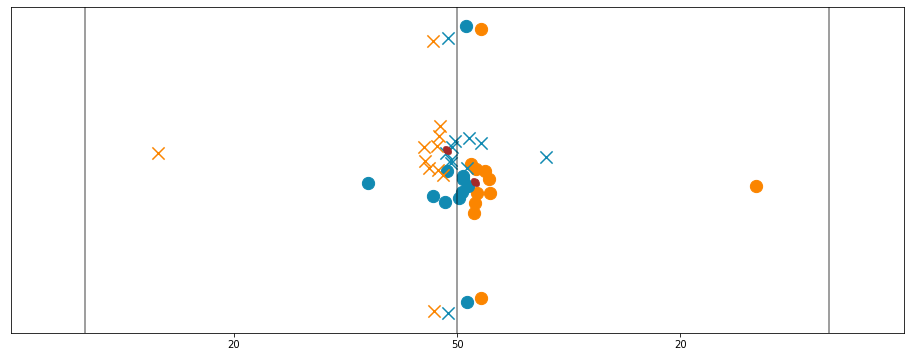

In [34]:
fig = plt.figure(figsize=(16, 6));
ax = plt.axes(xlim=(0, 120), ylim=(0, 53));

home_team = test_play.loc[test_play["team"] == 'home']
away_team = test_play.loc[test_play["team"] == 'away']
football =  test_play.loc[test_play["team"] == 'football']

ax.scatter(home_team["x"], home_team["y"], color="#fb8500", s=150)
ax.scatter(away_team["x"], away_team["y"], color="#118ab2", s=150)
ax.scatter(football["x"], football["y"], marker=football_marker, color="brown", s=250)

ax.scatter(home_team["x_norm"], home_team["y_norm"], color="#fb8500", s=150, marker="x")
ax.scatter(away_team["x_norm"], away_team["y_norm"], color="#118ab2", s=150, marker="x")
ax.scatter(football["x_norm"], football["y_norm"], marker=football_marker, color="brown", s=250)

ax.set_yticks([])
ax.set_xticks([30, 60, 90])
ax.set_xticklabels(["20", "50", "20"])
ax.vlines(10, 0, 53.3, color="black", linestyle='-', alpha=0.5)
ax.vlines(60, 0, 53.3, color="black", linestyle='-', alpha=0.5)
ax.vlines(110, 0, 53.3, color="black", linestyle="-", alpha=0.5)

In [41]:
punt_plays["homeTeamAbbr"]

0       PHI
1       PHI
2       PHI
3       PHI
4       PHI
       ... 
5986     SF
5987     SF
5988     SF
5989     SF
5990     SF
Name: homeTeamAbbr, Length: 5991, dtype: object

In [43]:
punt_plays["possessionTeam"]

0       PHI
1       PHI
2       ATL
3       PHI
4       ATL
       ... 
5986     SF
5987    SEA
5988    SEA
5989    SEA
5990     SF
Name: possessionTeam, Length: 5991, dtype: object

In [29]:
punt_plays["yardlineSide"]

1        PHI
4        PHI
5        ATL
10       PHI
11       ATL
        ... 
19957     SF
19958    SEA
19964    SEA
19967    SEA
19972     SF
Name: yardlineSide, Length: 5991, dtype: object

In [27]:
punt_plays["yardlineNumber"]

1         8
4        35
5        11
10       31
11       26
         ..
19957    20
19958    23
19964    27
19967    26
19972    41
Name: yardlineNumber, Length: 5991, dtype: int64

In [ ]:
k